In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Kang/Desktop/金融科技Final Project/領先指標csv/未命名檔案夾/融資融券餘額.csv', encoding = 'big5hkscs', index_col = 'Date')
df = df.set_index(pd.to_datetime(df.index))

In [3]:
df['資券互抵'] = df['融資(交易單位)'] - df['融券(交易單位)']
df['資券比'] = df['融資(交易單位)'] / df['融券(交易單位)']

# 畫圖

In [4]:
from matplotlib.font_manager import FontProperties
font_noto_12 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 12)
font_noto_18 = FontProperties(fname = '/Library/Fonts/NotoSansCJKtc-Regular.otf', size = 18)
from IPython.core.pylabtools import figsize
figsize(12, 8)

In [5]:
from matplotlib.ticker import FuncFormatter
#用來為y軸加上單位縮寫的函式
def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["B", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d} {suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print (val, signf)
                    if str(val).split(".")[1] == "0":
                        return '{val:d} {suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf) +"} {suffix}"
                return tx.format(val=val, suffix=suffix[i])

                #return y
    return y

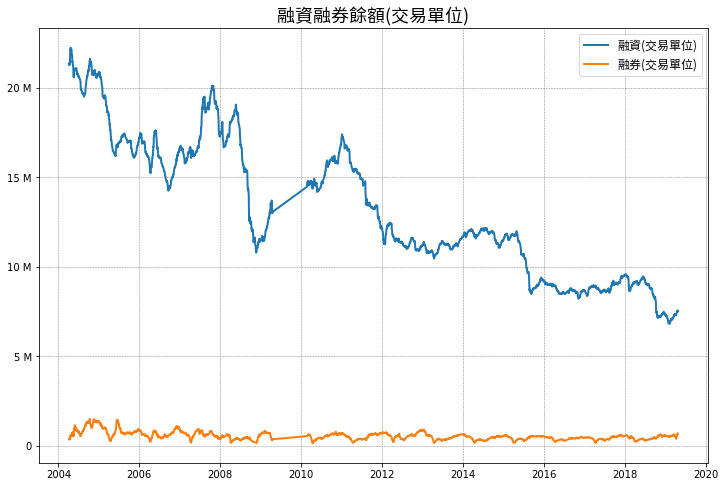

In [6]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[0:2]], linewidth=2)
plt.title('融資融券餘額(交易單位)', fontproperties = font_noto_18)
plt.legend(df.columns[0:2], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

In [7]:
df.columns[2]

'融資金額(仟元)'

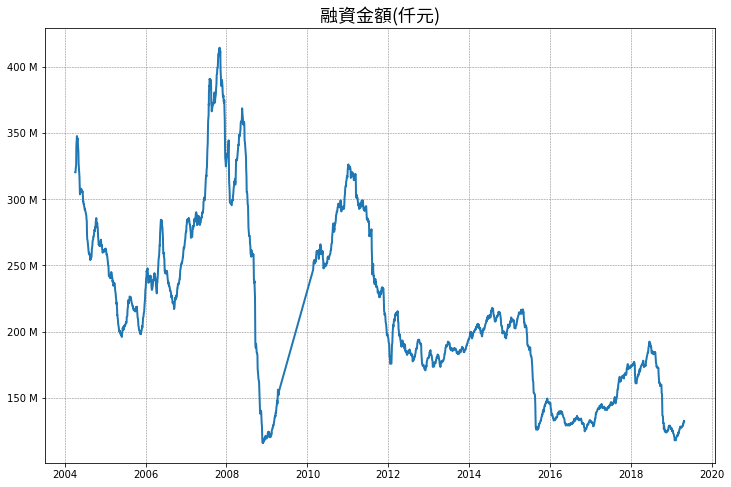

In [8]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[2]], linewidth=2)
plt.title('融資金額(仟元)', fontproperties = font_noto_18)
#plt.legend(df.columns[2], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

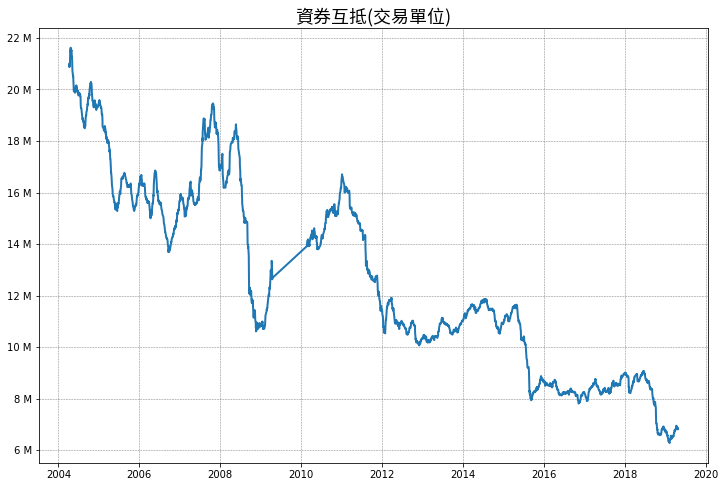

In [9]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[3]], linewidth=2)
plt.title('資券互抵(交易單位)', fontproperties = font_noto_18)
#plt.legend(df.columns[2], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

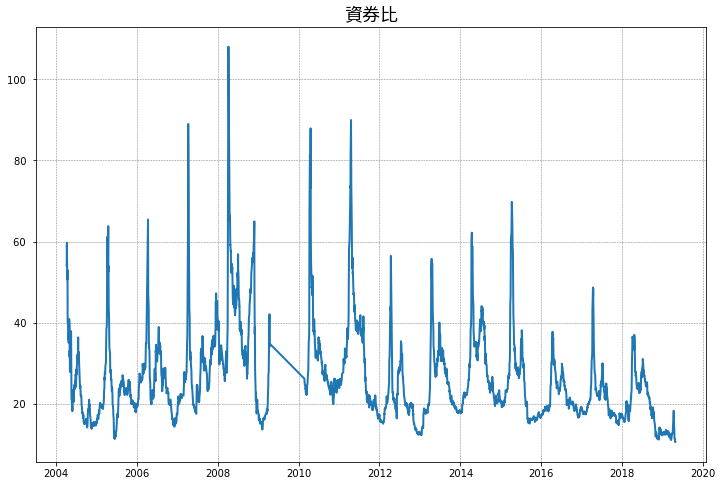

In [10]:
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(y_fmt))

plt.plot(df[df.columns[4]], linewidth=2)
plt.title('資券比', fontproperties = font_noto_18)
#plt.legend(df.columns[2], loc = 'best', prop = font_noto_12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 月均資料

In [11]:
df_m = df.resample('M').mean()

# Merge定期定額資料

In [12]:
df_periodic_invest = pd.read_csv('/Users/Kang/Desktop/CSVs/periodic_invest.csv', index_col = 0)
df_periodic_invest = df_periodic_invest.set_index(pd.to_datetime(df_periodic_invest.index))

In [13]:
merge = pd.merge(df_periodic_invest, df_m, right_index=True, left_index=True)

In [14]:
merge

,Units,People,NT dollars,融資(交易單位),融券(交易單位),融資金額(仟元),資券互抵,資券比
2016-04-30,646740,494755,3339348556,8.876586e+06,270521.842105,1.384425e+08,8.606064e+06,32.999395
2016-05-31,647841,491540,3320066240,8.586331e+06,326988.470588,1.321597e+08,8.259343e+06,26.348770
2016-06-30,626222,482408,3220463290,8.542426e+06,351227.333333,1.298054e+08,8.191199e+06,24.396368
2016-07-31,620540,478237,3204103712,8.547257e+06,316965.550000,1.308620e+08,8.230292e+06,27.052626
2016-08-31,629334,479580,3270332585,8.680371e+06,399754.826087,1.340230e+08,8.280617e+06,21.844831
2016-09-30,621588,476494,3227641830,8.719692e+06,429197.235294,1.342879e+08,8.290495e+06,20.354199
2016-10-31,619047,473936,3180583198,8.604794e+06,443079.000000,1.314273e+08,8.161715e+06,19.451360
2016-11-30,615909,470553,3205094427,8.376079e+06,455186.727273,1.270373e+08,7.920892e+06,18.455344
2016-12-31,606144,466241,3149472672,8.664526e+06,480417.272727,1.313007e+08,8.184109e+06,18.075833
2017-01-31,472237,385447,2420542262,8.566515e+06,473935.562500,1.312751e+08,8.092580e+06,18.082182


In [15]:
#merge.to_csv('/Users/Kang/Desktop/merge_data_3.csv', encoding = 'big5hkscs')